In [1]:
import os
import tarfile
import urllib

In [ ]:
## Fetching data

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [ ]:
## Getting dataframe and EDA

In [5]:
import pandas as pd

In [6]:
def loading_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)
    

In [7]:
housing = loading_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

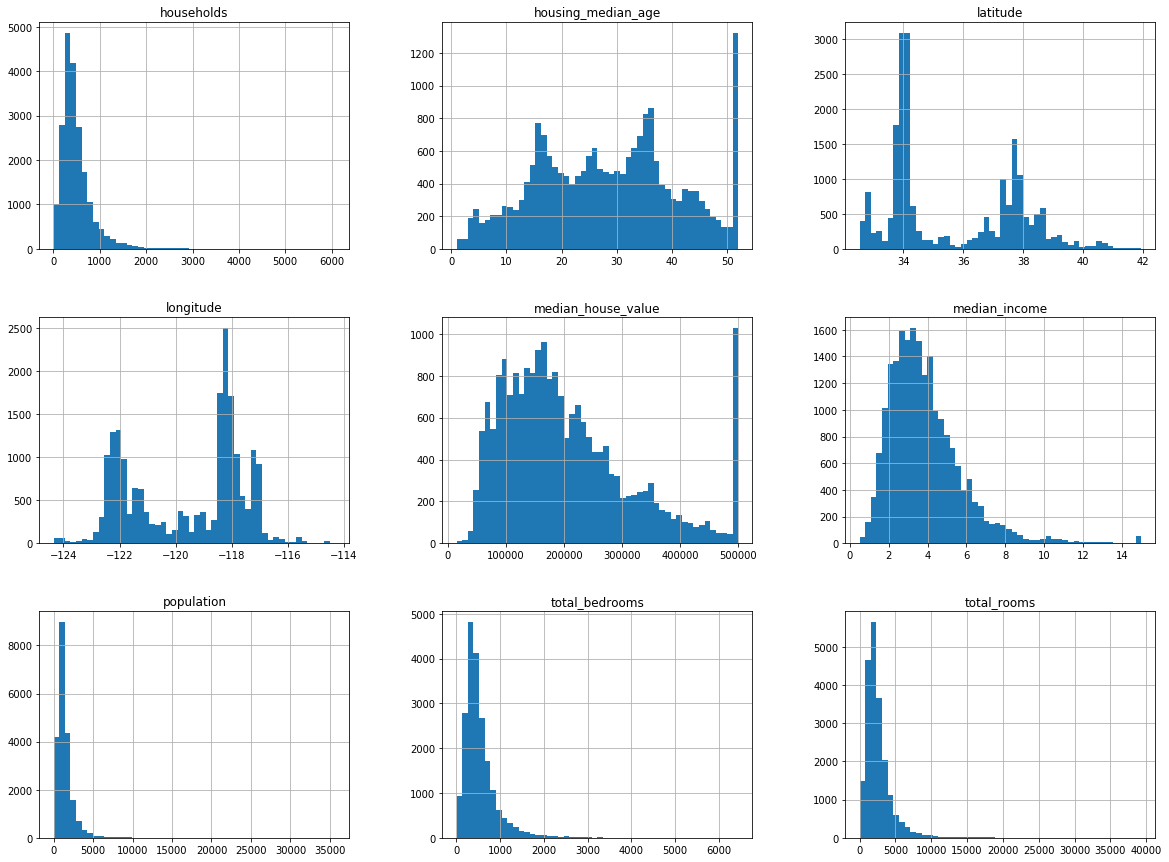

In [12]:
housing.hist(bins = 50,figsize=(20,15))
plt.show()

In [13]:
# Test set

In [ ]:
## Stratified sampling based on median income

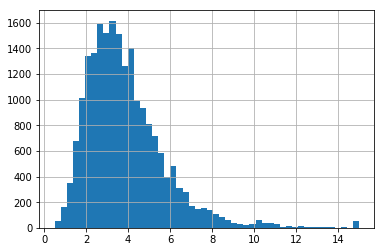

In [14]:
housing['median_income'].hist(bins = 50)
plt.show()

In [15]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [16]:
import numpy as np  

housing['income_cat'] = pd.cut(housing['median_income'], ## stratified Samplig
       bins = [0,1.5,3.0,4.5,6,np.inf],
      labels = [1,2,3,4,5])

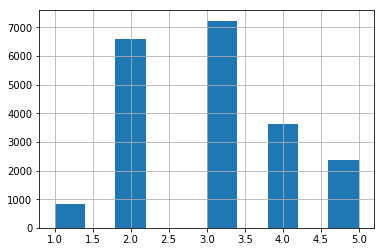

In [17]:
housing['income_cat'].hist()

In [18]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)

In [21]:
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [24]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [25]:
for dataframe in (strat_test_set,strat_train_set):
    dataframe.drop('income_cat',axis = 1, inplace = True)

In [26]:
# patern viz

In [27]:
housing = strat_train_set.copy()

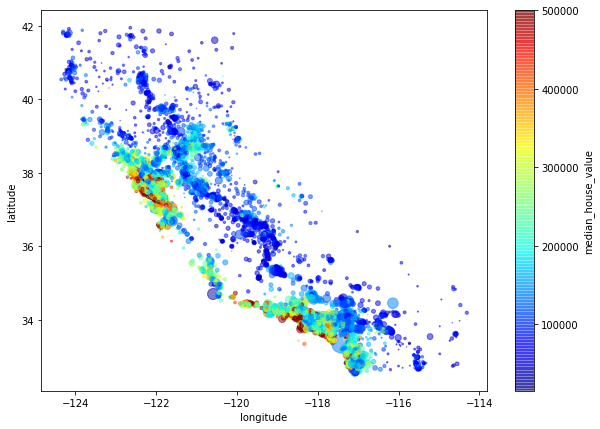

In [28]:
housing.plot(kind='scatter',x='longitude',y= 'latitude',alpha= 0.5,
             s = housing['population']/100,c = 'median_house_value',
            cmap = 'jet',figsize=(10,7))
plt.show()

In [47]:
# correlations

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

In [31]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

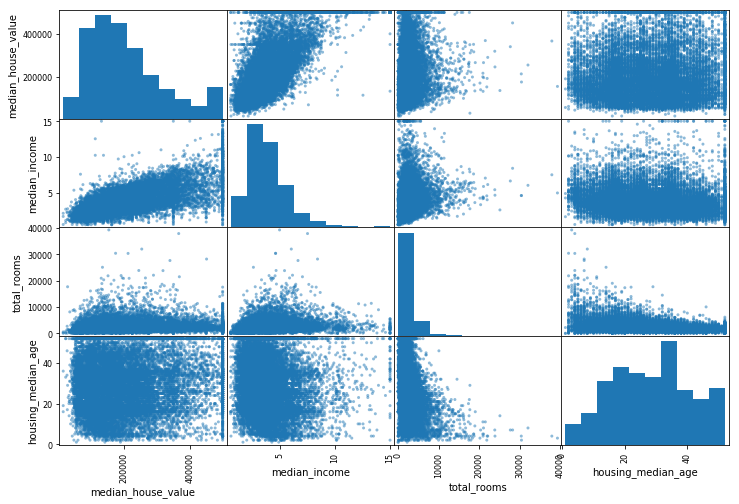

In [32]:
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

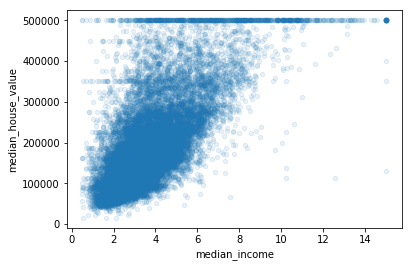

In [33]:
housing.plot(kind = 'scatter',x = 'median_income',y = 'median_house_value',
            alpha = 0.1)

In [ ]:
## Building combined attributes

In [34]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN

In [35]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [36]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [37]:
# data preparation

## we start from a fresh copy of the train set

In [38]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [39]:
## handling missing values

In [40]:
# numerical values

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer  = SimpleImputer(strategy='median')

In [43]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [44]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [45]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
X = imputer.transform(housing_num)

In [48]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [49]:
# categorical values

In [50]:
housing_cat = housing[['ocean_proximity']]

In [51]:
housing_cat.head()

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ordinal_encoder = OrdinalEncoder()

In [54]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [55]:
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [56]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
cat_encoder = OneHotEncoder()

In [59]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [60]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
## Custom transformer for combined attributes

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

In [63]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [64]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        rooms_per_household = X[:,population_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        

In [65]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [66]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [67]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 2.094395280235988,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 2.7079646017699117,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 2.0259740259740258,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 2.742483660130719,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 3.808988764044944,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 1.9859154929577465,
        1.9859154929577465]], dtype=object)

In [ ]:
## putting all numeric transformations in a pipeline

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [71]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [72]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.08649871,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.03353391,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.09240499,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.03055414,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.06150916,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.09586294,
        -0.09586294,  0.10180567]])

In [ ]:
## Making a pipeline for numeric and categorical transformations

In [73]:
from sklearn.compose import ColumnTransformer

In [74]:
num_attribs = list(housing_num)

In [75]:
cat_attribs = ['ocean_proximity']

In [76]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])

In [77]:
housing_prepared = full_pipeline.fit_transform(housing)

In [78]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
# Model Building

In [ ]:
## Linear regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lin_reg = LinearRegression()

In [81]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [90]:
print('Predictions:',lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [210536. 318264. 211472.  58992. 187240.]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
housing_predictions = lin_reg.predict(housing_prepared)

In [93]:
lin_mse = mean_squared_error(housing_predictions,housing_labels)

In [94]:
lin_rmse = np.sqrt(lin_mse)

In [96]:
lin_rmse ## Not very good predictions

68827.71705588042

In [97]:
# Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [101]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

0.0

In [102]:
## The model clearly overfits
## We use K-fold validation

In [103]:
from sklearn.model_selection import cross_val_score

In [112]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [113]:
print('Scores:',tree_rmse_scores)
print('Mean:',tree_rmse_scores.mean())
print('Standard Deviation:',tree_rmse_scores.std())

Scores: [69384.20927625 68970.91794254 70829.99505715 70008.30947334
 71241.94955089 74432.84890452 69996.02627924 70932.90758512
 74741.23239651 72035.19194407]
Mean: 71257.3588409622
Standard Deviation: 1870.878609805356


In [ ]:
## We do k-fold validation for linear regression

In [114]:
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [115]:
print('Scores:',lin_rmse_scores)
print('Mean:',lin_rmse_scores.mean())
print('Standard Deviation:',lin_rmse_scores.std())

Scores: [66875.74559933 67243.40523622 70155.77936736 74947.12109885
 67814.23872289 71300.87145282 65181.27435546 68212.32424289
 72368.32957916 67738.10380365]
Mean: 69183.71934586206
Standard Deviation: 2807.2369567324963


In [116]:
## We try Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [125]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [126]:
print('Scores:',forest_rmse_scores)
print('Mean:',forest_rmse_scores.mean())
print('Standard Deviation:',forest_rmse_scores.std())

Scores: [51515.16464463 49628.12179418 52881.79877587 55673.32677959
 52935.61774893 56031.74264966 51537.06193015 50977.90318374
 56270.42321514 54059.71309379]
Mean: 53151.08738156849
Standard Deviation: 2185.1774308842328


In [127]:
# Fine tuning parameters
## We use grid search

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [165]:
forest_reg = RandomForestRegressor()

In [166]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)

In [167]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [168]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [169]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [170]:
cvres = grid_search.cv_results_

In [171]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64109.58386769124 {'max_features': 2, 'n_estimators': 3}
55436.6521003934 {'max_features': 2, 'n_estimators': 10}
53262.81042220789 {'max_features': 2, 'n_estimators': 30}
59922.862425159714 {'max_features': 4, 'n_estimators': 3}
52918.50043945843 {'max_features': 4, 'n_estimators': 10}
50791.54951201366 {'max_features': 4, 'n_estimators': 30}
58879.812643505385 {'max_features': 6, 'n_estimators': 3}
53060.70114306787 {'max_features': 6, 'n_estimators': 10}
50771.696139725434 {'max_features': 6, 'n_estimators': 30}
59416.32933373755 {'max_features': 8, 'n_estimators': 3}
52738.91851256859 {'max_features': 8, 'n_estimators': 10}
50857.92285709225 {'max_features': 8, 'n_estimators': 30}
63656.81321280943 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54803.451801754614 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59227.402349758144 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53345.11730540507 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [140]:
## We can also try randomized search

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
forest_reg = RandomForestRegressor()

In [158]:
param_distribution= dict(n_estimators=[3,80], max_features= [2,8])

In [159]:
random_search = RandomizedSearchCV(forest_reg,param_distribution,cv = 5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)

In [160]:
random_search.fit(housing_prepared,housing_labels)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [161]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
## same result
## We stick to the Grid result

In [ ]:
# We check the importance of each attribute

In [186]:
features_importance = grid_search.best_estimator_.feature_importances_
features_importance

array([7.21681932e-02, 6.70334982e-02, 4.31105158e-02, 1.85382110e-02,
       1.78283492e-02, 1.68913934e-02, 1.75945712e-02, 3.56633341e-01,
       6.29183008e-02, 7.34952910e-02, 8.78615207e-02, 1.25364516e-02,
       1.43864913e-01, 9.16030739e-05, 3.87420065e-03, 5.55964613e-03])

In [173]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_hhold']

In [176]:
cat_encoder = full_pipeline.named_transformers_['cat']

In [181]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [185]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [189]:
sorted(zip(features_importance,attributes),reverse=True)

[(0.35663334124777396, 'median_income'),
 (0.14386491293926099, 'INLAND'),
 (0.08786152066247348, 'bedrooms_per_hhold'),
 (0.07349529098768916, 'pop_per_hhold'),
 (0.07216819317042585, 'longitude'),
 (0.06703349821504384, 'latitude'),
 (0.06291830081812903, 'rooms_per_hhold'),
 (0.04311051576231512, 'housing_median_age'),
 (0.018538210959029737, 'total_rooms'),
 (0.01782834918831089, 'total_bedrooms'),
 (0.01759457119947887, 'households'),
 (0.016891393356562052, 'population'),
 (0.012536451640857491, '<1H OCEAN'),
 (0.005559646125137109, 'NEAR OCEAN'),
 (0.0038742006536395374, 'NEAR BAY'),
 (9.16030738728483e-05, 'ISLAND')]

In [191]:
sum(features_importance)

0.9999999999999999

In [192]:
## we could drop some attributes

In [ ]:
# Evaluating model on test set

In [193]:
final_model = grid_search.best_estimator_

In [194]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [195]:
X_test_prepared = full_pipeline.transform(X_test)

In [196]:
final_predictors = final_model.predict(X_test_prepared)

In [197]:
final_mse = mean_squared_error(y_test,final_predictors)

In [198]:
final_rmse = np.sqrt(final_mse)

In [199]:
final_rmse

48487.830139657286

In [ ]:
## We check precision by computing confidence interval

In [200]:
from scipy import stats

In [201]:
confidence = 0.95

In [204]:
squared_errors = (final_predictors - y_test)**2

In [205]:
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46464.57135866, 50429.98068372])